# OBJECTIVE INSIGHT:

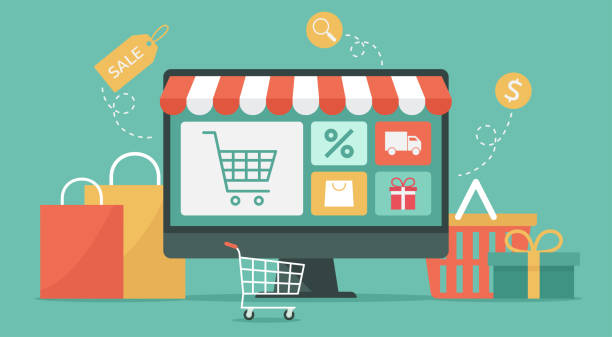

In [150]:
from IPython import display
display.Image('/Users/kriyanshgupta/Desktop/Jupyter/Store.jpeg')

# Problem Statement and Goal :



* An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.
* To ensure the success of online business, it is important for the retailers to understand their targeted customers. The aim of this study is to develop an instrument for investigating and understanding consumer’s online shopping orientations and factors that influence attitude toward online shopping and online shopping intention.

* 1. Using the company data, we have to find useful insights about the customer purchasing history that can be an added advantage for the online retailer.
* 2. Segment the customers based on their purchasing behavior.

# Getting to know the variables:

* InvoiceNo : The number of the invoice, unique per each purchase. 
* StockCode : Unique code per each item
* Description : Name of the item
* Quantity : The number of items within the invoice
* InvoiceDate : Date and time of the purchase
* Price : Price of a single item
* CustomerID : Unique id number per each customer
* Country : The country where the customer is living

# IMPORTING THE DEPENDENCIES:

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [69]:
df = pd.read_csv(r"OnlineRetail.csv",encoding= 'unicode_escape')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# PRIMARY DATA EXPLORATION:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [48]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)
    

InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']
--------------------------------------------------
StockCode
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
--------------------------------------------------
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
--------------------------------------------------
InvoiceDate
['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']
--------------------------------------------------
Country
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 

In [43]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

In [51]:
# filling the missing values
df.fillna("NaN",inplace=True)

In [53]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Choosing the Algorithm For the Project: 

* I have chosen RFM analyasis for above problem and K Means clustering for segmentation of customers.

* In order to maintain a good CRM (Customer Relationship Management), a company should be aware of each customer’s attitude towards the company. The company should know the answers to the following questions:

* when did the customer last purchased? (Recency)
* how often does the customer purchase? (Frequency)
* how much money did the customer spend? (Monetary)

* The answers to the above questions would make the customer be categorized and after this process, the company would be dealing with tens of segments instead of tens of thousands customers. 

* RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

* The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

* RFM is an acronym that stands for Recency, Frequency and Monetary. In order to assign each customer into the appropriate segment, RFM metrics should be calculated and afterwards RFM scores should be computed.

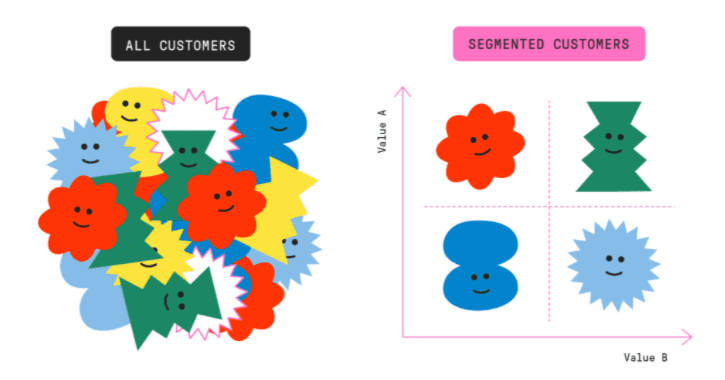

# Model Evaluation and Technique:

* Step 1:  Calculating R, F, and M values in Python:
* Step 2:  From the sales data we have, we calculate RFM values in Python and Analyze the customer behaviour and segment the customers based on RFM values.

# Finding out each customer RFM values

In [72]:
# Recency

day = "2012-01-01"
day = pd.to_datetime(day)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [73]:

recency = df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x:((day-x.max()).days)})
recency.head()

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


In [83]:
# Frequency

freq = df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()

In [133]:
freq.head(10)

,Frequency
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
12352.0,11
12353.0,1
12354.0,1
12355.0,1


In [85]:
# Monetary Value

df["tot_revenue"]= df["UnitPrice"]*df["Quantity"]

In [87]:
money = df.groupby(["CustomerID"])[["tot_revenue"]].sum()
money

,tot_revenue
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [122]:
# Naming the RFM Scores
RFM = pd.concat([recency,freq,money],axis=1)
recency.columns = ["Recency"]
freq.columns = ["Frequency"]
money.columns = ["Monetary"]

# RFM Scores 

In [123]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [91]:
# Standarinzing the RFM values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

Text(0, 0.5, 'Frequency')

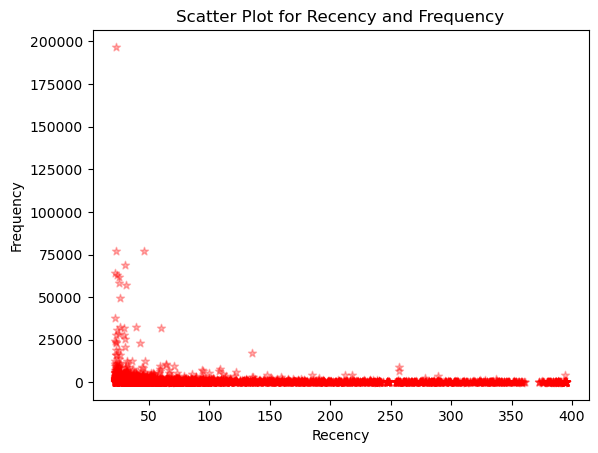

In [125]:
plt.scatter(RFM.groupby('CustomerID')['Recency'].sum(), df.groupby('CustomerID')['Quantity'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [126]:
#We can see the customers whose Recency is less than a month have high Frequency i.e the customers buying more when their recency is less.

Text(0, 0.5, 'Frequency')

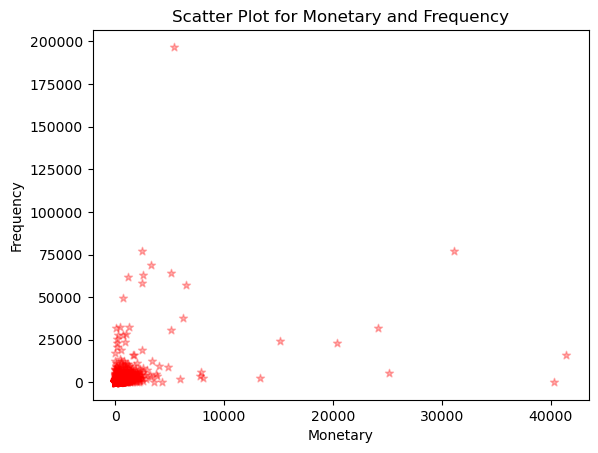

In [127]:
#Frequency Vs Monetary

market_data = df.groupby('CustomerID')[['Quantity', 'UnitPrice']].sum()

plt.scatter(market_data['UnitPrice'], market_data['Quantity'],
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [128]:
#We can see, customers buying frequently are spending less amount. 

Text(0, 0.5, 'Frequency')

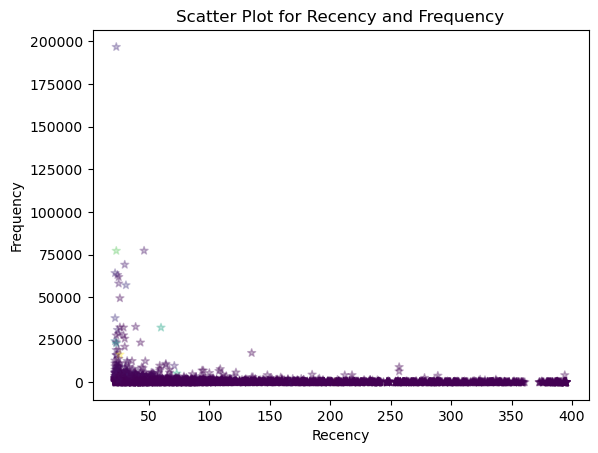

In [130]:
#Recency Vs Frequency Vs Monetary

Monetary = df.groupby('CustomerID')['UnitPrice'].sum()
plt.scatter(RFM.groupby('CustomerID')['Recency'].sum(), df.groupby('CustomerID')['Quantity'].sum(),
            marker = '*', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [131]:
#Now, in the above plot, the color specifies Monetary. From the above plot, we can say the customers whose Recency is less have high Frequency but less Monetary.

#This might vary from case to case and company to company. That is why we need to take all the 3 factors into consideration to identify customer behavior.

# CLustering and Segmentation

In [134]:
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(scaled)
    inertia.append(kmean.inertia_)

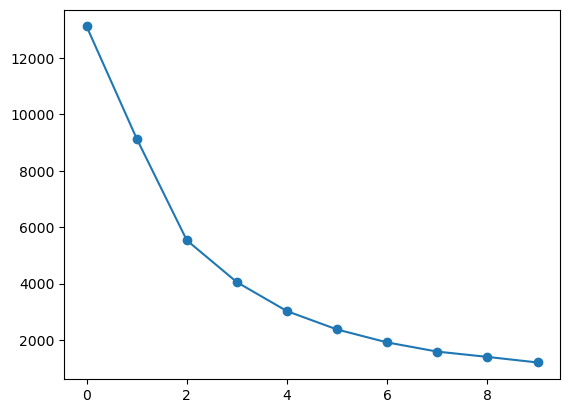

In [135]:
plt.plot(inertia,marker="o")

In [138]:
kmean = KMeans(n_clusters=3)
kmean.fit(scaled)
RFM["Clusters"]=(kmean.labels_ +1)

In [139]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,2
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2
...,...,...,...,...
18280.0,299,1,180.60,2
18281.0,202,1,80.82,2
18282.0,29,3,176.60,1


In [140]:
group = RFM.groupby(["Clusters"])["Recency","Frequency","Monetary"].mean()
group

/var/folders/0y/zymztxld5knbg674wm21fxdm0000gn/T/ipykernel_65813/573001174.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = RFM.groupby(["Clusters"])["Recency","Frequency","Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,61.518507,5.622455,1825.630038
2,267.622744,1.852888,460.359902
3,27.636364,86.772727,85058.839091


In [141]:
def func(seg):
    if seg["Clusters"]==1:
        return "Avg_cust"
    elif seg["Clusters"]==2:
        return "Big_cust"
    else:
        return "Low_spend_cust"

In [144]:
RFM["condition"]=RFM.apply(func,axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,condition
CustomerID,,,,,
12346.0,347,2,0.00,2,Big_cust
12347.0,24,7,4310.00,1,Avg_cust
12348.0,97,4,1797.24,1,Avg_cust
12349.0,40,1,1757.55,1,Avg_cust
12350.0,332,1,334.40,2,Big_cust
...,...,...,...,...,...
18280.0,299,1,180.60,2,Big_cust
18281.0,202,1,80.82,2,Big_cust
18282.0,29,3,176.60,1,Avg_cust


In [146]:
result = RFM["condition"].value_counts()
result

Avg_cust          3242
Big_cust          1108
Low_spend_cust      22
Name: condition, dtype: int64

<AxesSubplot:>

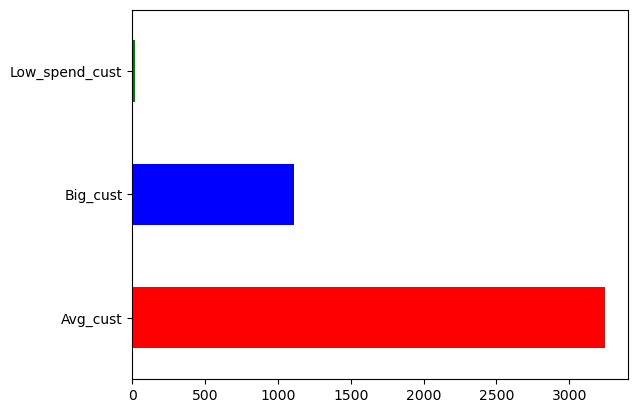

In [149]:
result.plot(kind="barh",color=["red","blue","green"])

# Recommendations:

* Based on the above RFM score, we can give some Recommendations.

* Best Customers: We can Reward them for their multiples purchases. They can be early adopters to very new products. Suggest them “Refer a friend”. Also, they can be the most loyal customers that have the habit to order.

* Low Customers: Send them personalized emails/messages/notifications to encourage them to order.

* Avg Customers: Notify them about the discounts to keep them spending more and more money on your products

* This is how we can target a customer based on the customer segmentation which will help in marketing campaigns. 

* Thus saving marketing costs, grab the customer, make customers spend more thereby increasing the revenue.

